# Identifying exoplanets

- Name: Hadrien Lacroix
- Last 3 digits of student ID: 129
- Email: hlacroix3@gatech.edu
- Submission date: 2021-12-02
- Course name: Data Mining and Statistical Learning
- Course number: ISYE 7406

## Abstract

## Introduction

Exoplanets are planets outside of our solar system. Despite a first possible evidence for the
existence of exoplanets in 1917, their existence has only been officially confirmed in 1992.
Since then, thousands of exoplanets and planetary systems have been identified. In a nutshell,
exoplanets are detected by observing the luminosity of stars and seeing whether or not they dim
at a regular interval. If so, it's possible that this dim is caused by a planet orbiting around it.
Identifying exoplanets is the first step to then potentially finding life outside of our solar system. Such a dim would create a sinusoidal pattern in the light intensity measurements.

![sinusoidal pattern](./assets/sinusoidal_pattern.png)

As proposed by the [Drake equation](https://en.wikipedia.org/wiki/Drake_equation), once planets are identified, we can investigate whether they could support life, have actually developed it, potentially an intelligent form, and potentially one that can release signals into space.

The goal of this project is to identify stars that are orbited by exoplanets. This will be a
classification project, and our goal will be to test different methods and algorithms to obtain the
best accuracy possible for predicting whether a star is orbited by planets or not. This will be a
classification problem.

One of the main disadvantages of such a project is how heavily imbalanced the dataset is. Most stars are
unfortunately not orbited by a planet, so most of our dataset will consist of non-exoplanet stars.
We will need to research and implement methods to deal with this imbalance in order to
minimize its impact on our model. Otherwise, the model could systematically predict that a star
is not orbited by an exoplanet and still boast an incredibly high accuracy score - while remaining
completely useless and failing to be of any help in future identification efforts.

![imbalance](./assets/imbalance.png)

We normalized the data, and then dealt with this imbalance using a technique called [SMOTE](https://www.jair.org/index.php/jair/article/view/10302) (more on this in the proposed methodology part), and also tried [ADASYNC](https://ieeexplore.ieee.org/document/4633969) without noticeable improvements.

We then tested a few models individually to assess their performance and find parameters that worked best, and then opted for an ensemble method approach. Most models were unhelpful, and we ended up selecting a Random Forest and running a Grid Search to find the best parameters. We obtained very good results on the SMOTE testing set, but terrible results on the original testing set. We then tried to find a model that could at least reduce the amount of non-exoplanets star, to speed up the process of human review and to provide a less-imbalanced dataset for future training.

In the end, we believe the training and testing sets we used are too small to train an efficient model, but we believe that we have a solid basis for a model that could work if fed more data from the Kepler mission. We also provide alternative ways to go about this search (image analysis, feature enrichment) detailed in the *Conclusions* section.

## Data
The dataset used was made available [here](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data) by Winter Delta.

The training set counts 5087 observations and 3198 columns. Each observation is a star. The first column is the label of the star: 1 if it's not orbitted by a planet, 2 if it is. We replaced 1 by 0 and 2 by 1. The rest of the columns consists of light intensity measurements at different times. The training set counts only 37 stars orbitted by an exoplanet.  

The testing set counts 570 observations and 3198 columns as well. Just like for the training set, each observation is a star. The first column is the label of the star: 1 if it's not orbitted by a planet, 2 if it is. We replaced 1 by 0 and 2 by 1. The rest of the columns consists of light intensity measurements at different times. The training set counts only 5 stars orbitted by an exoplanet.

## Proposed methodology

We first normalized all of the luminosity values.

The priority was then to deal with the imbalance in the dataset. With a baseline model predicting that none of the stars are orbitted by an exoplanet, we could achieve a 99.12% accuracy. But this model completely fails in our objective to actually identify exoplanets.

We don't care about accuracy. We care about [recall](https://en.wikipedia.org/wiki/Precision_and_recall), i.e. how many relevant items are retrieved. If we care about recall, then our baseline model has a recall of 0, which sounds a lot less impressive.  

$$recall = \frac{True\ Positives}{(True\ Positives + False\ Negatives)}$$

However, we still need to pay attention to out negative classes. We would be OK identifying a few stars as orbitted by exoplanets when in reality they aren't, as these can be analyzed by expert astrophysicists further after the algorithm offered a first selection, but we wouldn't want to miss out on an exoplanet. That being said, we shouldn't be too lenient as we don't want to send half of the stars back for human analysis. So we also need to pay attention to [specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity).  

$$specificity = \frac{True\ Negatives}{(True\ Negatives + False\ Positives)}$$

To address the imbalance, undersampling would be useless. We don't care about reducing the number of negative observations; we care about increasing the number of positive ones so that the algorithm can better learn the corresponding features (light intensity patterns). Oversampling by simply copying the existing positive observations would probably help, but we would be duplicating existing data.  

We decided to implement the SMOTE (Synthetic Minority Oversampling Technique) approach. SMOTE consists in creating new instances of the minority class. Notice these new instances are not simple copies: the algorithm takes samples of the feature space for the target class and its nearest neighbors, and combines the features of the target class with the features of its neighbors to create new instances.

![imbalance_solved](./assets/imbalance_solved.png)

We split this dataset, keeping 67% of the data for training and 33% for testing. However, we actually don't care about testing on the SMOTE test set. What we're interested in is the original test set, which has a lot less observations corresponding to stars orbitted by an exoplanet. Training on the SMOTE train set however provided the advantage of feeding the model with a lot more examples of stars orbitted by exoplanets. 

**Note:** Moving forward, we will refer to the SMOTE datasets as the *SMOTE* training and testing sets, and to the training and testing sets introduced in the data section as the *original* training and testing sets).

**Note:** We also implemented an oversampling technique called [ADASYN](https://ieeexplore.ieee.org/document/4633969), which is derived from SMOTE, to see if we would get better results trqining our model on such a dataset. We didn't witness any noticeable improvement.

We then set a random seed equal to 42 to use in the models where appropriate, and tried different classifiers. Considering the state of the dataset, it was difficult to assess which classifier would work and which wouldn't. We ran different models to see which ones provided encouraging results. Most classifiers completely failed: standard Support Vector Machines, K-Nearest Neighbor, Quadratic Discriminant Analysis, Adaboost, or even neural net displayed a very low recall. Logistic Regression, Decision Tree and Random Forest provided encouraging results, with a recall ranging from 0.4 to 0.6. We decided to favor an ensemble model, as they tend to display better performance overall and also robustness. We trained a voting classifier, but this didn't improve results as the stars correctly identified were the same for all the models, so there was no combined effectiveness improvement effect. We decided to focus on the Random Forest model. Tweaking the hyperparameters with a grid search, we managed to obtain a recall of 1 on the SMOTE testing set, and of 0.8 on the original testing set (thus correctly identifying 4 stars orbitted by  an exoplanet, out of 5).

## Analysis and results

#### The good: results on the SMOTE test set

Having detailed our general approach and failures above, in this section we will present results for the best model we obtained, but we won't present results for all the suboptimal models that we tried.

The best results we got were obtained with an ensemble model, a Random Forest Classifier with:
- a class weight balanced for the minority class
- a gini criterion
- a maximum depth of 20
- a maximum number of features equal to the log2 of the number of features in the dataset
- a minimum number of samples required to be at a leaf node set at 10
- a number of trees in the forest set to 45

Training this model on the SMOTE training data, and testing it on the SMOTE testing data, we obtained both very good recall and specificity:

![random_forest_smote_test](./assets/random_forest_smote_test.png)

This looks really great:
- the model correctly identifies almost all stars orbitted by an exoplanet correctly (recall score of 99.63%)
- the model correctly identifies almost all stars not orbitted by an exoplanet correcly (specificity score of 99.88%)

#### The bad: results on the original test set

This is where the whole performance unfortunately deteriorates. Testing the model above on the test set, we obtain terrible results.

Basically, using the model above, that seemed to perform so well, on the training set, we get a recall of 0. We fail to identify any of the actual exoplanets. This was a surprise for us as we expected the model to have picked up a pattern, and to identify the exoplanets as all the positive examples in SMOTE were derive from the 5 original exoplanets.

#### The ugly: lowering our expectations

We retrained the random forest model, optimizing for recall but allowing for a low specificity. The objective of such a manipulation, in light of our failure to generalize our model and to hand off a certain selection of all exoplanets (and just that), is to provide a model that can reduce the sample and eliminate stars that are certainly not orbitted by an exoplanet.

We used the following model, a Random Forest Classifier with:
- a class weight of 1 for the negative class (absence of exoplanet)
- a class weight of 1 for the positive class (presence of exoplanet)
- a gini criterion
- a maximum depth of 50
- a maximum number of features equal to the log2 of the number of features in the dataset
- a minimum number of samples required to be at a leaf node set at 40
- a number of trees in the forest set to 60

Doing so, we don't miss out on any exoplanets (no False Negatives). We end up with 210 True Negatives, and 355 False Positives. This is far from our ideal result, but the good news is that we can rule out 36.8% of the observations (True Negatives). So we our model at least has the advantage, if not to identify exoplanets, at least to rule out a non-negligible amount of observations and to reduce the amount of data that should be analyzed. This reduced data can then be reviewed by human experts, which would still save time compared to the original dataset, or to provide a reduced dataset with decreased imbalance for training further models.

## Conclusion

### Possible future work

#### Adding more observations
The dataset provided by Winter Delta counts 5,657 star observations in total, but the Kepler mission
monitored over 100,000 stars over its course. The whole data for the Kepler mission is available
on the [Mikulski Archive for Space Telescopes website](https://archive.stsci.edu/missions-and-data/kepler), so the integrality of the data could be used. More qualified data would most likely help improve the model. Doing so would require some additional data preprocessing effort on the light curves data to match the structure of the Winter Delta dataset, and to convert `.fits` data to the `.csv` format. We could rely on the [Kepler Data Processing Handbook](https://archive.stsci.edu/files/live/sites/mast/files/home/missions-and-data/kepler/_documents/KSCI-19081-002-KDPH.pdf) for this effort. The data might also be enriched with K2 campaign data, K2 being the mission that followed into
the Kepler mission footsteps.

#### Leveraging image data
More data could also be be added on top of the simple light intensity observations to feed more features to our model (full frame images, target pixel files...). Image analysis and computer vision techniques could then be leveraged, but might prove computing intensive or costly.

#### Adding more variables
In this project, we rely on a unique variable: light intensity. More features could prove useful for identification, for example orbital period, transit epoch, eccentricity value, longitude of periastron, transition period, transit depth, object radius... All of this data can be gathered if we suspect the star is orbitted by an object. Such data is already gathered by NASA in the [Kepler Objects of Interest Table](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html).

#### Improving model understanding of exoplanets
There is an [open catalogue of identified exoplanets](http://openexoplanetcatalogue.com/) that is maintained and updated on a [GitHub repository](https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue) by Hanno Rein, an astrophysics professor at the univeristy of Toronto. A model could be trained on such a dataset to better learn and memorize the characteristics of exoplanets, and improve identification results, especially if coupled with the addition of features as suggested above.

#### Experimenting with neural networks
We tried a simple neural network which didn't yield encouraging results, but it's possible that a well-tuned neural network could outperform our current model. It's worth a try.

### Lessons learned

This dataset being a time series, in retrospect it may not have been the best choice as a final project for this course, which among other things offered techniques about variable selection which could not be implemented in this project.

It's also a heavily imbalanced dataset on an expert scientific topic, and although it's a fascinating topic to work on in our opinion, it might have been a little ambitious to believe we would be able to offer a really good solution to the problem of identifying exoplanets. A training set with 37 observations and a testing set with only 5 observations corresponding to our item of interest might simply be too low and insufficient for our initial objective.

## Appendix

### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import AdaBoostClassifier, \
                             RandomForestClassifier, \
                             VotingClassifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, \
                            classification_report, \
                            confusion_matrix, \
                            ConfusionMatrixDisplay, \
                            f1_score, \
                            make_scorer, \
                            recall_score, \
                            roc_curve, \
                            precision_score

from sklearn.model_selection import cross_val_score, \
                                    train_test_split, \
                                    GridSearchCV


teal = '#007791'
pd.set_option('display.max_columns', 9)

### Data

In [2]:
train = pd.read_csv('data/exoTrain.csv')
test = pd.read_csv('data/exoTest.csv')

In [3]:
len(train)

5087

In [4]:
len(test)

570

In [5]:
mapping = {1: 0, 2: 1}
train['LABEL'] = train['LABEL'].map(mapping)
test['LABEL'] = test['LABEL'].map(mapping)

In [6]:
train_x, train_y = train.drop('LABEL', axis=1), train.LABEL
test_x, test_y = test.drop('LABEL', axis=1), test.LABEL

In [7]:
#train.head()

In [8]:
#train.describe()

In [9]:
train['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [10]:
train.isnull().sum().sum()

0

In [11]:
#test.head()

In [12]:
#test.describe()

In [13]:
test['LABEL'].value_counts()

0    565
1      5
Name: LABEL, dtype: int64

In [14]:
test.isnull().sum().sum()

0

In [15]:
train_none = train[train['LABEL'] == 0].drop('LABEL', axis=1)
len(train_none)

5050

### Baseline model

In [16]:
baseline = pd.DataFrame(0, index=np.arange(len(test)), columns=['LABEL'])
comparison = baseline.LABEL == test.LABEL
comparison.sum() / len(comparison)

0.9912280701754386

### Normalize and standardize

In [17]:
train_label = train[['LABEL']]

min = train.drop(['LABEL'], axis=1).min().min()
max = train.drop(['LABEL'], axis=1).max().max()
norm_train = (train.drop(['LABEL'], axis=1) - min) / (max - min)
norm_train = pd.concat([train_label, norm_train], axis=1)
#norm_train.head()

In [18]:
test_label = test[['LABEL']]

min = test.drop(['LABEL'], axis=1).min().min()
max = test.drop(['LABEL'], axis=1).max().max()
norm_test = (test.drop(['LABEL'], axis=1) - min) / (max - min)
norm_test = pd.concat([test_label, norm_test], axis=1)
#norm_test.head()

In [19]:
norm_train_x, norm_train_y = norm_train.drop('LABEL', axis=1), norm_train.LABEL
norm_test_x, norm_test_y = norm_test.drop('LABEL', axis=1), norm_test.LABEL

### Class imbalance

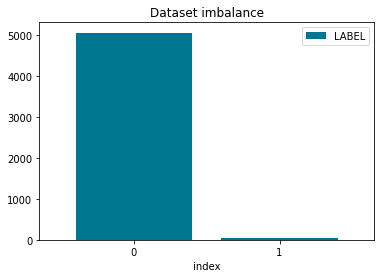

In [20]:
norm_train['LABEL'].value_counts() \
              .reset_index()  \
              .plot(kind='bar', x='index', y='LABEL', rot=0, color=teal, width=0.8, title='Dataset imbalance') \
              .legend(loc='upper right')
#plt.savefig(fname='004', format='png', dpi=400)
#plt.show()

### SMOTE

In [21]:
model = SMOTE()
smote_x, smote_y = model.fit_resample(norm_train_x, norm_train_y)
smote_y = smote_y.astype('int')

In [22]:
smote_y.value_counts().sort_index()

0    5050
1    5050
Name: LABEL, dtype: int64

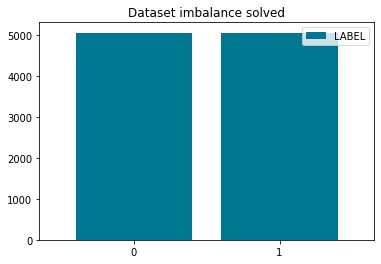

In [23]:
smote_y.value_counts() \
       .sort_index()   \
       .plot(kind='bar', x='index', y='LABEL', rot=0, color=teal, width=0.8,
             title='Dataset imbalance solved') \
       .legend(loc='upper right')

#plt.savefig(fname='005', format='png', dpi=400)
#plt.show()

In [24]:
smote_train_x, smote_test_x, smote_train_y, smote_test_y = train_test_split(smote_x, smote_y,
                                                                            test_size=0.33,
                                                                            random_state=42)

### ADASYN

In [25]:
from imblearn.over_sampling import ADASYN 

ada = ADASYN(random_state=42)
ada_x, ada_y = ada.fit_resample(norm_train_x, norm_train_y)

ada_train_x, ada_test_x, ada_train_y, ada_test_y = train_test_split(ada_x, ada_y,
                                                                    test_size=0.33,
                                                                    random_state=42)

### Modeling

#### Ensemble method on SMOTE

In [26]:
# Set seed
seed = 42

# Define function to get model results
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('Ensemble accuracy (testing data)', accuracy_score(y_test, prediction))
    print('Ensemble with SMOTE F-score (testing data)', f1_score(y_test, prediction))
    print('Ensemble with SMOTE recall (testing data)', recall_score(y_test, prediction))
    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    

# Define the classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=seed)
clf2 = MLPClassifier(max_iter=300)
#clf2 = DecisionTreeClassifier(max_depth=5, class_weight={0: 1, 1: 12}, random_state=seed)
clf3 = RandomForestClassifier(class_weight={0: 1, 1: 12}, criterion='gini', max_depth=13, max_features='log2',
                              min_samples_leaf=104, n_estimators=150, n_jobs=-1, random_state=seed)
clf4 = KNeighborsClassifier(n_neighbors=1, weights='distance')
#clf5 = SVC(C=0.1, kernel='poly', random_state=seed)
clf7 = QuadraticDiscriminantAnalysis()
clf8 = AdaBoostClassifier(n_estimators=100, random_state=seed)

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[#('lr', clf1),
#                                              ('nn', clf2)],
                                              ('rf', clf3)],
#                                              ('knc', clf4)],
#                                              ('svc', clf5),
#                                              ('qda', clf7)],
#                                              ('adb', clf8)],
                                              voting='hard')

# Get the results 
get_model_results(smote_train_x, smote_train_y, test_x, test_y, ensemble_model)

Ensemble accuracy (testing data) 0.40350877192982454
Ensemble with SMOTE F-score (testing data) 0.022988505747126436
Ensemble with SMOTE recall (testing data) 0.8
              precision    recall  f1-score   support

           0       1.00      0.40      0.57       565
           1       0.01      0.80      0.02         5

    accuracy                           0.40       570
   macro avg       0.50      0.60      0.30       570
weighted avg       0.99      0.40      0.57       570

[[226 339]
 [  1   4]]


In [27]:
rf = RandomForestClassifier(class_weight={0:1, 1:1}, criterion='gini', max_depth=50, max_features='log2',
                            min_samples_leaf=40, n_estimators=60, n_jobs=-1, random_state=seed)

rf.fit(smote_train_x, smote_train_y)
prediction = rf.predict(smote_test_x)
    
#ConfusionMatrixDisplay.from_predictions(smote_test_y, prediction, cmap='winter')
#plt.title('Confusion Matrix - Random Forest with SMOTE (SMOTE testing data)')
#plt.savefig(fname='011.png', format='png', dpi=400)
#plt.show()

In [28]:
rf = RandomForestClassifier()

param_grid = { 
    'class_weight': ['balanced'],
    'n_estimators': [15,30,45,60],
    'max_features': ['log2'],
    'max_depth' : [10,20,30,40],
    'min_samples_leaf': [10,20,30,40],
    'criterion': ['gini', 'entropy'],
    'n_jobs': [-1]
}

scorers = {'Recall': make_scorer(recall_score)}#, 'Specificity': make_scorer(recall_score, pos_label=0)}

grid_rf = GridSearchCV(rf, param_grid=param_grid, scoring=scorers, cv=5, verbose=1, refit='Recall')

In [29]:
grid_rf.fit(smote_train_x, smote_train_y)
print(grid_rf.best_params_)
prediction = grid_rf.predict(smote_test_x)
    
#ConfusionMatrixDisplay.from_predictions(smote_test_y, prediction, cmap='winter')
#plt.title('Confusion Matrix - Random Forest with SMOTE (testing data)')
#plt.savefig(fname='011.png', format='png', dpi=400)
#plt.show()

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 60, 'n_jobs': -1}


In [30]:
prediction = grid_rf.predict(norm_test_x)

#ConfusionMatrixDisplay.from_predictions(norm_test_y, prediction, cmap='winter')
#plt.title('Confusion Matrix - Random Forest with SMOTE (original testing data)')
#plt.savefig(fname='011.png', format='png', dpi=400)
#plt.show()

### Ensemble method on ADASYN

In [31]:
rf = RandomForestClassifier()

param_grid = { 
    'class_weight': ['balanced'],
    'n_estimators': [15,30,45,60],
    'max_features': ['log2'],
    'max_depth' : [10,20,30,40],
    'min_samples_leaf': [10,20,30,40],
    'criterion': ['gini', 'entropy'],
    'n_jobs': [-1]
}

scorers = {'Recall': make_scorer(recall_score), 'Specificity': make_scorer(recall_score, pos_label=0)}

grid_rf = GridSearchCV(rf, param_grid=param_grid, scoring=scorers, cv=5, verbose=1, refit='Recall')

grid_rf.fit(ada_train_x, ada_train_y)

print(grid_rf.best_params_)

prediction = grid_rf.predict(ada_test_x)

#ConfusionMatrixDisplay.from_predictions(ada_test_y, prediction, cmap='winter')
#plt.title('Confusion Matrix - Random Forest with SMOTE (SMOTE testing data)')
#plt.savefig(fname='011.png', format='png', dpi=400)
#plt.show()

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 45, 'n_jobs': -1}


In [32]:
prediction = grid_rf.predict(norm_test_x)
    
#ConfusionMatrixDisplay.from_predictions(norm_test_y, prediction, cmap='winter')
#plt.title('Confusion Matrix - Random Forest with SMOTE (original testing data)')
#plt.savefig(fname='011.png', format='png', dpi=400)
#plt.show()

## Bibliography

- “Drake Equation.” Wikipedia. Wikimedia Foundation, November 25, 2021. https://en.wikipedia.org/wiki/Drake_equation. 
- Chawla, N. V., K. W. Bowyer, L. O. Hall, and W. P. Kegelmeyer. “Smote: Synthetic Minority over-Sampling Technique.” Journal of Artificial Intelligence Research 16 (2002): 321–57. https://doi.org/10.1613/jair.953.
- Xiaoharper. “ML Studio (Classic): Smote - Azure.” ML Studio (classic): SMOTE - Azure | Microsoft Docs. Accessed December 2, 2021. https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/smote.
- Haibo He, Yang Bai, Edwardo A. Garcia, and Shutao Li. “Adasyn: Adaptive Synthetic Sampling Approach for Imbalanced Learning.” 2008 IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence), 2008. https://doi.org/10.1109/ijcnn.2008.4633969. 
- “Kepler.” MAST. Accessed December 2, 2021. https://archive.stsci.edu/missions-and-data/kepler.
- Jenkins, J. M., (ed.) 2017. Kepler Data Processing Handbook: KSCI-19081-002
- “Data Columns in Kepler Objects of Interest Table.” Data columns in Kepler Objects of Interest Table. Accessed December 2, 2021. https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html. 
- “Open Exoplanet Catalogue.” Open Exoplanet Catalogue. Accessed December 2, 2021. http://openexoplanetcatalogue.com/. 
- OpenExoplanetCatalogue. “OpenExoplanetCatalogue/open_exoplanet_catalogue: The Main Data Repository for the Open Exoplanet Catalogue.” GitHub. Accessed December 2, 2021. https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue. 
- “Precision and Recall.” Wikipedia. Wikimedia Foundation, October 18, 2021. https://en.wikipedia.org/wiki/Precision_and_recall. 
- “Sensitivity and Specificity.” Wikipedia. Wikimedia Foundation, November 23, 2021. https://en.wikipedia.org/wiki/Sensitivity_and_specificity. 